# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

In [1]:
# Fijamos el parámetro RANDOM_STATE
RANDOM_STATE = 333

# Apartado 1: Clustering

__Número de grupo: 15__

__Nombres de los estudiantes:__
- Daniela Alejanda Córdova
- David Bugoi
- Erik Karlgren Domercq

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `countries_of_the_world.csv` que se proporciona junto con la práctica. Usa como índice el nombre de los países. 

Vamos a eliminar la columna `Region` por ser categórica y todas las filas en las que faltan valores usando la operación `dropna`.

Muestra el dataframe resultante y explica cuántos países y variables contiene.

In [2]:
import pandas as pd

df = pd.read_csv (r'countries_of_the_world.csv', index_col='Country')
df = df.drop(['Region'], axis=1)  # Eliminamos la columna 'Region'
df = df.dropna()                  # Eliminamos las filas a las que les falten valores
df

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,
Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
Anguilla,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
Antigua & Barbuda,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,0.92,96.13,2.0,18.71,4.92,0.040,0.419,0.541
Vietnam,84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
Yemen,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393


Tras eliminar los países de los que no sabemos algunos datos y la columna 'Region', tenemos en total 179 países (1 por cada fila) y tantas variables como columnas tiene el dataframe, es decir, 18.

## 2) Análisis de los datos

En este notebook vamos a trabajar con un subconjunto de las variables. Crea un nuevo dataframe que sólo contenga las variables `GDP ($ per capita)`, `Literacy (%)`, `Phones (per 1000)`, `Agriculture`, `Industry` y `Service`. ¿Qué crees que representan cada una de esas variables?

Analiza razonadamente las distribuciones de cada una de las variables (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [3]:
dp = df.loc[:, ['GDP ($ per capita)', 'Literacy (%)','Phones (per 1000)','Agriculture','Industry','Service']]
dp.describe()

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,9125.698324,81.944134,208.151955,0.156905,0.288028,0.554508
std,9644.123141,19.837537,210.121875,0.151343,0.140310,0.165670
min,500.000000,17.600000,0.200000,0.000000,0.032000,0.062000
25%,1800.000000,69.950000,27.100000,0.039000,0.197000,0.424500
50%,5100.000000,90.900000,137.100000,0.101000,0.274000,0.559000
75%,12950.000000,97.800000,335.000000,0.233000,0.349000,0.668500
max,37800.000000,100.000000,898.000000,0.769000,0.906000,0.954000


### Significado de las variables
Viendo el rango de valores de cada una de las variables podemos deducir qué significa cada una de ellas:
- ***GDP ($ per capita)*:** Producto Interior Bruto (PIB) per cápita en dólares.
- ***Literacy (%)*:** porcentaje de la población que sabe leer y escribir o tasa de alfabetización.
- ***Phones (per 1000)*:** número de teléfonos por cada 1000 habitantes.
- ***Agriculture*, *Industry* y *Service*:** porcentaje del PIB dedicado a la agricultura, la industria y el sector servicios respectivamente.


### Análisis de cada variable
#### GDP ($ per capita)
La desviación típica (9644.12) es muy alta respecto a la media (9125.70), con lo que deducimos que hay una gran diferencia entre los países con mayor y menor PIB per cápita. De hecho vemos que el valor del tercer cuartil es alrededor de 2.5 veces mayor que el del primer cuartil, y el valor máximo es casi 3 veces mayor que el valor del tercer cuartil, lo que confirma nuestras conclusiones.

#### Literacy (%)
La tasa de alfabetización es superior al 90% en alrededor de la mitad de los países analizados, y superior al 69.95% en el 75% de los países con mayor tasa de alfabetización, por lo que la mayoría de la población en la gran mayoría de países sabe leer y escribir. Solo vemos una reducción drástica en dicha tasa al comparar el primer cuartil con el país con menor tasa de alfabetización de todos. 


#### Phones (per 1000)
Al igual que con el PIB per cápita, tenemos una desviación típica alta (210.12) respecto a la media (208.15). Además, este valor crece exponencialmente de cada cuartil al siguiente, por lo que hay una gran diferencia entre los países con más moviles y los que menos.

#### Agriculture
De media (15%) es el sector económico menos importante de todos, y de hecho en la mitad de los países el sector agricultor no supera el 10% del PIB del país, lo que sugiere que la mitad de las economías del mundo no dependen en gran medida de este sector. Solo en un 25% de los países el sector agricultor supone más del 23% del PIB (significativamente por encima de la media), lo cual es porcentaje bastante importante. 

#### Industry
Este es el segundo sector económico más importante de media (28.8%) a nivel mundial. La desviación típica es menor en relación a la media que con el sector de la agricultura, por lo que hay menos países que dependan mucho o muy poco de la industria. De hecho las diferencias entre cuartiles en términos relativos (no absolutos) es bastante menor que en el caso del sector de la agricultura.

#### Service
El sector servicios es de media (55%) el sector económico más importante de los 3. Al igual que pasaba con la industria al compararla con la agricultura, el porcentaje del PIB del sector servicios tiene menor desviación típica que el de la industria. Esto indica que pocos países dependen mucho más o mucho menos de este sector que el resto de países y las diferencias relativas entre cuartiles no son grandes en comparación con los otros 2 sectores.

### Análisis de cada par de variables
Veamos las correlaciones par a par. Nos será útil dibujar las gráficas que agrupan a cada par de variables con `seaborn.pairplot()`.

In [4]:
# Correlaciones par a par
dp.corr(method='pearson')

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
GDP ($ per capita),1.000000,0.522880,0.883520,-0.616919,0.032855,0.536551
Literacy (%),0.522880,1.000000,0.592042,-0.620514,0.105703,0.474395
Phones (per 1000),0.883520,0.592042,1.000000,-0.631578,-0.084247,0.649638
Agriculture,-0.616919,-0.620514,-0.631578,1.000000,-0.352785,-0.613489
Industry,0.032855,0.105703,-0.084247,-0.352785,1.000000,-0.521413
Service,0.536551,0.474395,0.649638,-0.613489,-0.521413,1.000000


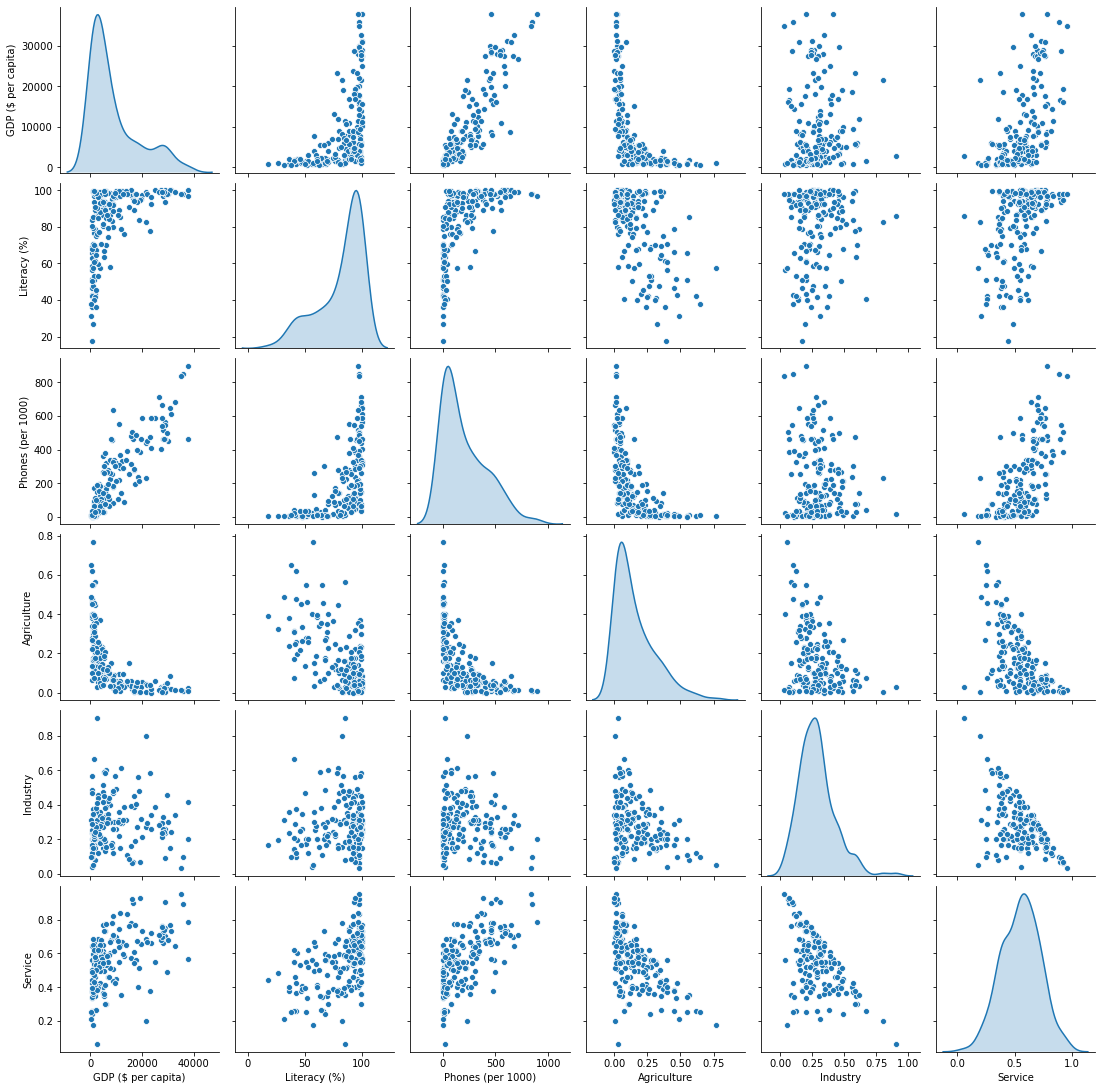

In [5]:
import seaborn as sns

# Gráficas par a par
sns.pairplot(dp, diag_kind='kde')

La correlación más alta entre cualquier par de variables es entre el PIB per cápita) y el número de teléfonos por cada 1000 habitantes, siendo de 0.88 (muy alta). Eso sugiere que debe haber una relación muy estrecha entre ambas variables.

Por otro lado, el porcentaje del PIB de la agricultura tiene una correlación negativa bastante fuerte (alrededor de -0.6) con el PIB per cápita, la tasa de alfabetización y el número de teléfonos por cada 1000 habitantes. Esto nos lleva a pensar que los países más ricos y con mayor educación no suelen tener un sector agrario importante.

El sector económico que mejor predice el PIB per cápita de un país es el sector servicios, pues es el que tiene una mayor correlación positiva con el PIB per cápita, mientras que la del sector industrial no tiene correlación alguna y no nos sirve para predecir la riqueza de un país. El sector servicios también tiene una correlación positiva bastante notable con la tasa de alfabetización y el número de teléfonos por cada 1000 habitantes. Lo primero podría ser debido a que los trabajos en este sector en muchas ocasiones requieren de un nivel mínimo de educación, mientras que lo segundo podría deberse a que cuantas más personas tengan un teléfono móvil más demanda de servicios y productos informáticos habrá.

## 3) Preprocesar los datos

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de países similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

### Análisis de qué normalización usar

In [6]:
import statistics as stats

print("GDP ($ per capita)")
print("MEDIA: ", stats.mean(dp.iloc[:,0]))
print("MEDIANA: ", stats.median(dp.iloc[:,0]))
print("MODE: ", stats.mode(dp.iloc[:,0]))

GDP ($ per capita)
MEDIA:  9125.698324022347
MEDIANA:  5100.0
MODE:  700.0


Para que sea una distribución normal: la moda, media y mediana deben coincidir. En el caso del PIB per cápita no coincide, y por ello, no es una distribución normal; lo mismo pasa con el resto de variables.

In [7]:
print("Literacy:")
print("MEDIA: ", stats.mean(dp.iloc[:,1]))
print("MEDIANA: ", stats.median(dp.iloc[:,1]))
print("MODE: ", stats.mode(dp.iloc[:,1]))
print("\nPhones")
print("MEDIA: ", stats.mean(dp.iloc[:,2]))
print("MEDIANA: ", stats.median(dp.iloc[:,2]))
print("MODE: ", stats.mode(dp.iloc[:,2]))
print("\nAgriculture")
print("MEDIA: ", stats.mean(dp.iloc[:,3]))
print("MEDIANA: ", stats.median(dp.iloc[:,3]))
print("MODE: ", stats.mode(dp.iloc[:,3]))
print("\nIndustry")
print("MEDIA: ", stats.mean(dp.iloc[:,4]))
print("MEDIANA: ", stats.median(dp.iloc[:,4]))
print("MODE: ", stats.mode(dp.iloc[:,4]))
print("\nService")
print("MEDIA: ", stats.mean(dp.iloc[:,5]))
print("MEDIANA: ", stats.median(dp.iloc[:,5]))
print("MODE: ", stats.mode(dp.iloc[:,5]))

Literacy:
MEDIA:  81.94413407821229
MEDIANA:  90.9
MODE:  99.0

Phones
MEDIA:  208.15195530726257
MEDIANA:  137.1
MODE:  2.3

Agriculture
MEDIA:  0.1569050279329609
MEDIANA:  0.10099999999999999
MODE:  0.04

Industry
MEDIA:  0.28802793296089385
MEDIANA:  0.27399999999999997
MODE:  0.17

Service
MEDIA:  0.5545083798882682
MEDIANA:  0.5589999999999999
MODE:  0.55


Luego analizando esto, podemos concluir que no podemos usar el _StandardScaler_ ya que las variables no siguen una distribución normal. Entonces, los datos debemos reescalarlos con _MinMaxScaler_.
Solo el caso de _Service_ parece ser el de una variable que sigue una distribución normal, pero MinMaxScaler también debería funcionar bien para esta variable.

### Preparación para escalar los datos

Para poder observar bien cómo escalar los datos es mejor que no hacerlo, tendremos un grupo no escalado y otro que sí:

In [8]:
# Creamos copias de los puntos para no modificar los originales
X1 = dp.copy()  # Grupo sin escalar
X2 = dp.copy()  # Grupo escalado

#### Grupo sin escalar

In [9]:
from sklearn.cluster import KMeans

# Crear una instancia del agrupador k-means
km1 = KMeans(init='random', n_clusters=3, random_state=RANDOM_STATE)

# Agrupar los puntos en clusters
km1.fit(X1)

# Podemos consultar el cluster asignado a cada punto y el centro de cada cluster
labels = km1.labels_
centers = km1.cluster_centers_

#### Grupo escalado

In [10]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler escala los datos al intervalo [0-1] sin modificar su distribución
scaler = MinMaxScaler()  # Lo uso porque los puntos no siguen distribucion estandar
scaler.fit(X2)

S2_scaled = scaler.transform(X2)  # Cambia los datos a un sistema de coordendas escalado

# Aplicamos ahora k-means
km2 = KMeans(init='random', n_clusters=3, random_state=RANDOM_STATE)
km2.fit(S2_scaled)

# Lo convertimos a un Dataframe para poder usar la funcion "plot_clusters"
S2_scaledDF = pd.DataFrame(S2_scaled)

Una vez que hemos agrupado los puntos en clusters tanto escalando como sin escalar los datos, nos interesa ver gráficamente qué clusters han surgido en ambos casos. Los puntos no son bidimensionales, pero aun así podemos ver qué pinta tienen las gráficas que comparaban variables 2 a 2 (como hicimos en el apartado anterior), solo que separando los puntos de cada cluster usando colores diferentes.

Definimos primero una función para dibujar los clusters.

In [11]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_clusters(X, labels=None, centers=None, index1=0, index2=1, xlabel=None, ylabel=None):
    """ Función auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """
    
    colors = ['r','g','b','c','y','k','m',]
    fig = plt.figure(figsize=(3,3))
    
    # Los dos primeros parámetros de la función scatter son las coordenadas de los puntos,
    # el parámetro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear 
    # las distintas clases
    plt.scatter(X.iloc[:,index1], X.iloc[:,index2], c=labels, cmap=ListedColormap(colors))
    
    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)
    
    if xlabel is not None:
        plt.xlabel(xlabel)
    if ylabel is not None:
        plt.ylabel(ylabel)
    
    plt.show()

Sin escalar:


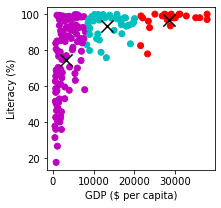

Con escala:


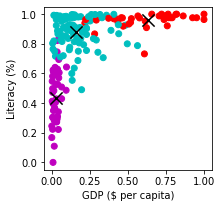

Sin escalar:


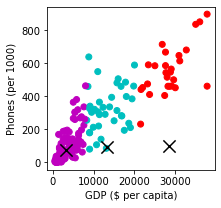

Con escala:


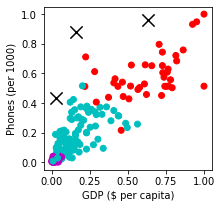

Sin escalar:


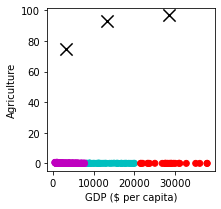

Con escala:


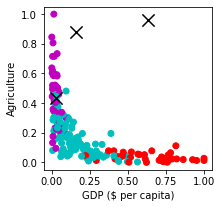

Sin escalar:


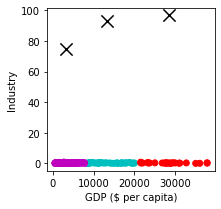

Con escala:


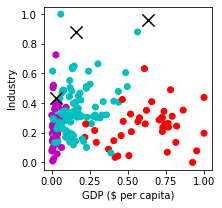

Sin escalar:


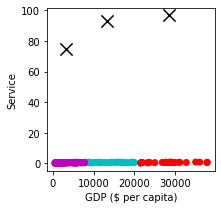

Con escala:


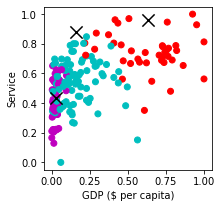

Sin escalar:


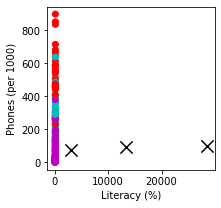

Con escala:


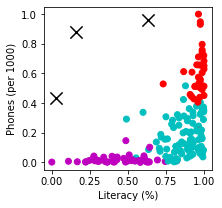

Sin escalar:


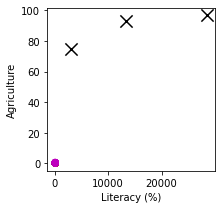

Con escala:


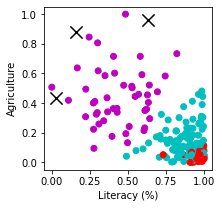

Sin escalar:


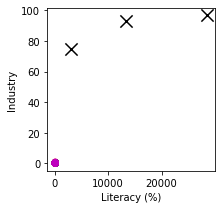

Con escala:


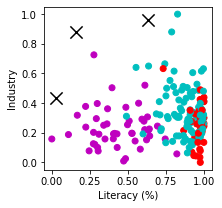

Sin escalar:


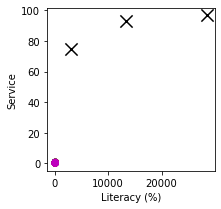

Con escala:


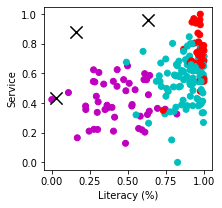

Sin escalar:


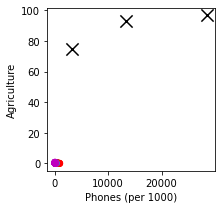

Con escala:


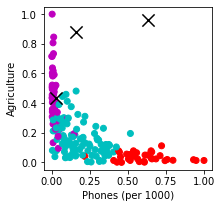

Sin escalar:


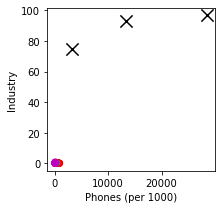

Con escala:


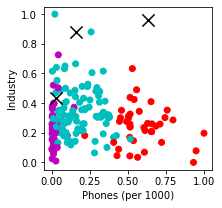

Sin escalar:


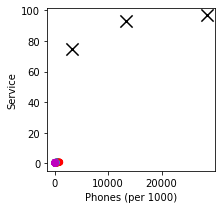

Con escala:


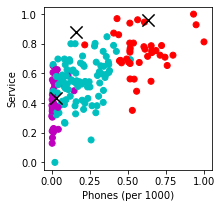

Sin escalar:


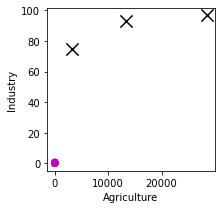

Con escala:


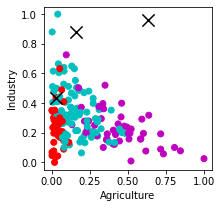

Sin escalar:


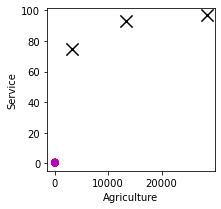

Con escala:


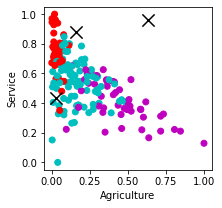

Sin escalar:


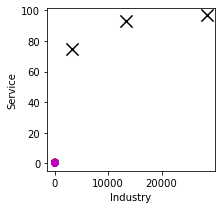

Con escala:


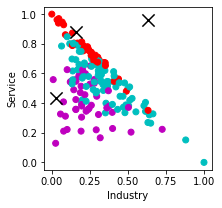

In [12]:
i = 0
while i < len(X2.columns):
    j=i+1
    while j < len(X2.columns):
        xlabel = X2.columns[i]
        ylabel = X2.columns[j]
        print("Sin escalar:")
        plot_clusters(X1, km1.labels_, km1.cluster_centers_, i, j, xlabel, ylabel)
        print("Con escala:")
        # Se hace con datos escalados
        plot_clusters(S2_scaledDF, km2.labels_, km2.cluster_centers_, i, j, xlabel, ylabel)
        j+=1
    i+=1

Como se puede observar, en las gráficas de los datos sin escalar en muchas ocasiones los puntos se dibujan muy juntos porque los centroides son muy lejanos. Este hecho de que los centroides estén tan lejos de los puntos de sus clusters correspondientes sugiere que no se pueden estar clasificando bien los puntos. Por tanto, conviene escalar las variables antes de ponernos a crear clusters.

## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo, el índice `davies_boulding` y el coeficiente `silhouette` en función del número de clusters.

Trabajaremos con una copia de `S2_scaled` para determinar el número óptimo de clusters.

In [13]:
X3 = S2_scaled.copy()
X3 = pd.DataFrame(X3)

Calculamos el _score_ (suma de distancias de cada punto al centroide de su cluster), el índice de _Davies-Bouldin_ (razón entre las distancias intra-cluster y las distancias inter-cluster) y el coeficiente _silhouette_ (distancia media al cluster más cercano menos distancia media intra-cluster dividido entre el mayor de ambos) para cada caso, pues lo vamos a necesitar para decidir cuál es el mejor número de clusters.

In [14]:
from sklearn.metrics import davies_bouldin_score, silhouette_score
# Variando cluster entre 2 y 10
K_MAX = 10
K_MIN = 2
score = np.zeros(K_MAX - K_MIN)
davies_boulding = np.zeros(K_MAX - K_MIN)
silhouette = np.zeros(K_MAX - K_MIN)

for k in range(K_MIN, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=RANDOM_STATE)
    km.fit(X3)
    # Para cada uno de ellos mido los 3 indices
    score[k-2] = -1 * km.score(X3)
    davies_boulding[k-2] = davies_bouldin_score(X3, km.labels_)
    silhouette[k-2] = silhouette_score(X3, km.labels_)

Dibujamos el diagrama del codo a partir del _score_ obtenido para cada caso cantidad de clusters. Nos interesa encontrar el punto donde la curva deja de descender rápidamente. Para los siguientes comentarios, entendemos que k es un número de clusters.

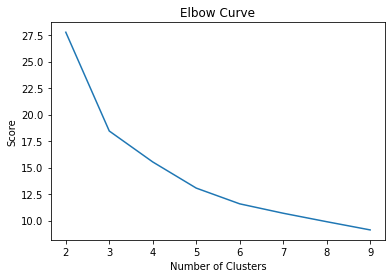

In [15]:
# diagrama del codo: distancia media de cada punto al centroide
plt.plot(range(K_MIN, K_MAX), score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

La curva deja de descender rápidamente en k=3, lo que sugiere que dicho valor podría ser el número ideal de clusters.

Veamos cómo se comporta el índice de Davies-Boulding, el cual nos interesa minimizar:

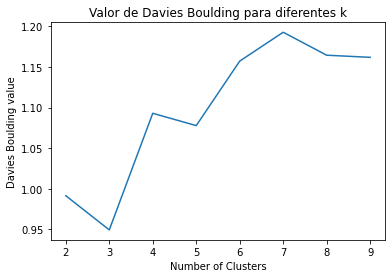

In [16]:
# davies boulding: distancia media desde punto a centroide y distancia entre clusters 
plt.plot(range(2, K_MAX), davies_boulding)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Boulding value')
plt.title('Valor de Davies Boulding para diferentes k')
plt.show()

El valor más pequeño también es k=3. Parece que el número óptimo de clusters debe de ser este mismo.

Veamos los valores de Silhouette. Queremos elegir el valor más cercano a 1.

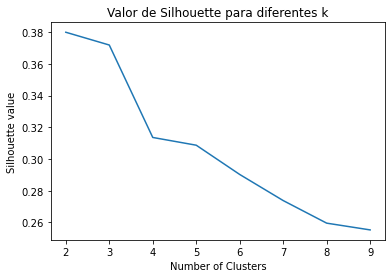

In [17]:
# silhouette
plt.plot(range(2, K_MAX), silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette value')
plt.title('Valor de Silhouette para diferentes k')
plt.show()

El valor más cercano a 1 es k=2, pero k=3 no está mucho más lejos. Según el índice de Silhouette estos serían los mejores valores.

#### Conclusión

Elegimos k=3, por las siguientes razones (las que hemos explicado antes):
- Para empezar, en el diagrama de codo vemos que el valor en el que la grafica cambia su curvatura y deja de descender tan rápido es k=3.
- En segundo lugar, en el diagrama de los índices de David-Boulding el valor buscado es el  más pequeño de la gráfica. En este caso se encuentra en k=3.
- Por último, en el diagrama de los índices de Silhouette el valor que buscamos es el más grande. En este caso es k=2, seguido de k=3.

Como en dos de los diagramas el valor óptimo que nos sale es k=3 y en el tercer diagrama k=3 es el segundo mejor número de clusters, elegimos k=3.

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior y trata de identificar el grupo de países que contienen. Si te han salido más de 3 elige 3 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y pinta el diagrama de dispersión en función de cada par de variables usando colores diferentes para cada cluster. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar `kMeans` con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un `SettingWithCopyWarning` por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

In [18]:
# MinMaxScaler escala los datos al intervalo [0-1] sin modificar su distribución
scaler = MinMaxScaler() # lo uso porque no se que los puntos siguen distrinucion estandarscaler.fit(X2)
scaler.fit(X2)

S2_scaled = scaler.transform(X2) #cambia los datos a un sistema de coordendas scaled

# Aplicamos ahora k-means
km = KMeans(init='random', n_clusters=3)
km.fit(S2_scaled)

#Lo convertimos a un Dataframe para poder usar la funcion "plot_clusters"
S2_scaledDF = pd.DataFrame(S2_scaled)

- GP + lITERACY
- Phones + gdp
- Phone + Literacy Mejor
 - qUIZAS literacy acgircultura
 
 Peores son las uniones con serivico y agricultura

Los que mejor separan son:
    - GDP +  Literacy
    - GDP + Phones
    - Phones + Industry
    - Phones + Service
    
 Quizas: Literacy + agriculture, phones + agriculture
 
 Se confunden mas:
     -Agriculture + GDP?
     -GDP + SERVICE?
     - AGRICULTURE + LITERACY
     - AGIRUCLUREE + SERVICE

GDP + LITERACY CON PHONES

Podemos observar los labels asignados:

In [20]:
 km.labels_

array([1, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0,
       0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 2, 0, 2, 0, 1, 0, 2,
       1, 2, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 2, 1, 0, 0, 1, 2, 2, 0, 2, 0,
       0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 2, 2, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0,
       0, 0, 1, 0, 2, 2, 0, 2, 1, 1, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 2, 0, 1, 0, 0,
       2, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 0, 0, 1, 0, 0,
       1, 0, 0], dtype=int32)

Hacemos una copia del dataframe original y a este se le asigna una nueva columna con los labels obtenidos anteriormente:

In [21]:
import pandas as pd

dfCopy = X2.copy()
# crear data frame con los puntos originales
df2 = pd.DataFrame(X2)
# añadir una columna con el cluster al que pertenece cada punto
dfCopy = dfCopy.assign(cluster = km.labels_)
dfCopy

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service,cluster
Country,,,,,,,
Afghanistan,700.0,36.0,3.2,0.380,0.240,0.380,1
Albania,4500.0,86.5,71.2,0.232,0.188,0.579,0
Algeria,6000.0,70.0,78.1,0.101,0.600,0.298,0
Anguilla,8600.0,95.0,460.0,0.040,0.180,0.780,2
Antigua & Barbuda,11000.0,89.0,549.9,0.038,0.220,0.743,2
...,...,...,...,...,...,...,...
Venezuela,4800.0,93.4,140.1,0.040,0.419,0.541,0
Vietnam,2500.0,90.3,187.7,0.209,0.410,0.381,0
Yemen,800.0,50.2,37.2,0.135,0.472,0.393,1


In [22]:
# mostramos la matriz transpuesta para que la info salga en vertical
dfCopy.groupby(["cluster"]).describe().transpose()

cluster                              0            1             2
GDP ($ per capita) count     92.000000    47.000000     40.000000
                   mean    6523.913043  1480.851064  24092.500000
                   std     4524.690981   816.311508   7732.893030
                   min      700.000000   500.000000   8600.000000
                   25%     3275.000000   800.000000  17950.000000
                   50%     5450.000000  1300.000000  25900.000000
                   75%     9000.000000  1850.000000  29025.000000
                   max    21500.000000  4100.000000  37800.000000
Literacy (%)       count     92.000000    47.000000     40.000000
                   mean      89.920652    53.589362     96.915000
                   std        8.884504    14.501683      3.872821
                   min       58.000000    17.600000     77.900000
                   25%       85.025000    42.300000     96.550000
                   50%       92.250000    52.900000     97.950000
                   75%       97.350000    65.950000     99.000000
                   max       99.900000    85.300000    100.000000
Phones (per 1000)  count     92.000000    47.000000     40.000000
                   mean     165.720652    17.148936    530.172500
                   std      107.955035    23.621378    138.167347
                   min        3.700000     0.200000    194.500000
                   25%       75.075000     3.600000    458.375000
                   50%      141.500000     9.700000    493.300000
                   75%      260.525000    19.550000    590.025000
                   max      463.800000   131.800000    898.000000
Agriculture        count     92.000000    47.000000     40.000000
                   mean       0.119283     0.340723      0.027450
                   std        0.084219     0.149452      0.019916
                   min        0.002000     0.073000      0.000000
                   25%        0.058000     0.243500      0.010750
                   50%        0.099500     0.322000      0.021500
                   75%        0.164000     0.424500      0.040000
                   max        0.370000     0.769000      0.086000
Industry           count     92.000000    47.000000     40.000000
                   mean       0.334859     0.232468      0.245600
                   std        0.145356     0.118078      0.115622
                   min        0.088000     0.040000      0.032000
                   25%        0.229750     0.167500      0.175000
                   50%        0.311000     0.204000      0.252000
                   75%        0.412250     0.281500      0.298000
                   max        0.906000     0.666000      0.585000
Service            count     92.000000    47.000000     40.000000
                   mean       0.544826     0.426936      0.726675
                   std        0.134877     0.124527      0.119561
                   min        0.062000     0.177000      0.375000
                   25%        0.445000     0.351500      0.671000
                   50%        0.551500     0.406000      0.729000
                   75%        0.640750     0.542000      0.780000
                   max        0.818000     0.643000      0.954000

### GDP
__Count:__
- Grupo 1 es mucho mas grande que el Grupo 0 y Grupo 2

__Mean - Min - Max - std:__
- Grupo 0 consiste en un rango mucho más grande de valores y por ello no estan tan cercanos a media (por ello la std es mayor comparada con el resto). Sabiendo su cantidad, podemos entonces entender que este grupo a pesar de ser de un rango de valores grandes, es reducido comparado con la cantidad del Grupo 1.
- Grupo 1 consiste en un grupo de gran rango pero su distribución es mas cercana a la media (std) que la del grupo 0. Por ello podemos entender por qué el algoritmo los unió de esta forma ya que existen muchos individuos pero que no tienen sentido siendo agrupados en el Grupo 0 o Grupo 2.
- Consiste en el grupo con mejor std, ya que su rango de valores es mucho más pequeño. El algoritmo agrupó todos los individuos de menor valor GDP en este grupo. Por ello son gráfica de densidad es la siguiente.

__25% 50% 75% :__
- Se puede observar la distribución de los percentiles son razonables tomando en cuenta lo analizando anteriormente. 


cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: GDP ($ per capita), dtype: object

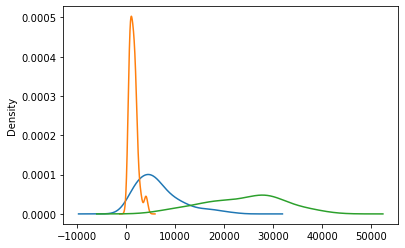

In [23]:
dfCopy.groupby(["cluster"])["GDP ($ per capita)"].plot.density()

### Literacy 

__Count:__
- Igual que en el GDP, Grupo 1 es mucho mas grande que el Grupo 0 y Grupo 2

__Mean - Min - Max - std:__
- Los 3 grupos poseen una std de menor valor indicando que están más cercanos a la media de ese grupo. Podemos entonces entender que se ha agrupado bien cada cluster.
- A pesar de que el Grupo 1 es mucho mayor que los demás, tomando en cuenta lo anterior, podemos entender que entre los datos existían un gran grupo de individuos de valores entre 58.000000 99.900000.
- En esta agrupación comparando los máximos y mínimos de los cluster 0 y 1, se puede observar que los 2 grupos se mezclan. Es decir, no está perfectamente separado. Esto se puede observar en la gráfica de densidad de abajo, donde la gráfica naranja cubre una parte del rango de la curva azul

__25% 50% 75% :__
- Se puede observar la distribución de los percentiles son razonables tomando en cuenta lo analizando anteriormente. 

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Literacy (%), dtype: object

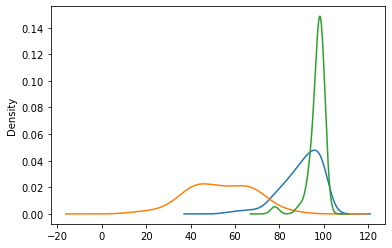

In [24]:
dfCopy.groupby(["cluster"])["Literacy (%)"].plot.density()

### Phones (per 1000)
__Count:__
- Vemos como hay un numero parecido de paises en el cluster 0 y 2 pero en el 1 hay  el doble.


__Mean,std,min,max:__
- Vemos como el cluster que tiene los valores mas altos es el 0, gracias a la media,max y min.Tambien vemos que los valores no estan tan cercanos a la media por tener la mayor desviacion tipica de los 3 clusters.
- Cluster 1 vemos que agrupa los valores medios y los agrupa con una desviacion tipica un poco grande. Esto nos indica que no estan muy cerca unos de otros
- El cluster 2 tiene la media mas baja y tiene el que menos desvacion tipica. Esto nos muestra que para el cluster 0 los valores son pequeños y todos muy cercanos unos a otros. 


__25% 50% 75% :__
- Vemos como el cluster 0 agrupa muchos valores en un trozo muy pequeño generando una densidad muy grande.
- El cluster 1 agrupa bastantes pero en un trozo mas grande generando poco densidad,y el cluster 3 40 en un trozo mas grande que el de 0 y 1 teniendo menos densidad.

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Phones (per 1000), dtype: object

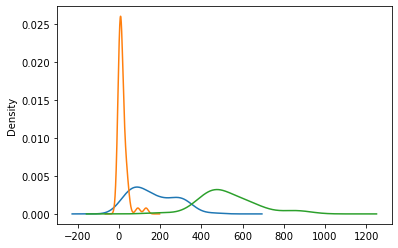

In [25]:
dfCopy.groupby(["cluster"])["Phones (per 1000)"].plot.density()

### Agriculture
__Count:__
- Vemos como hay un numero parecido de paises en el cluster 0 y 2 pero en el 1 hay  el doble.


__Mean,std,min,max:__
- Vemos como el cluster que tiene los valores mas altos es el 2, gracias a la media,max y min.Tambien vemos que los valores no estan tan cercanos a la media por la mayor desviacion tipica de los 3 clusters.
- Aun asi el cluster 0 tiene el que menos desvacion tipica, esto genera una mayor densidad ya que los valores de los paises pertenecientes a ese cluster estan muy cerca de la media.


__25% 50% 75% :__
- Vemos como el cluster 0 agrupa muchos valores en un trozo muy pequeño generando una densidad muy grande.
- El cluster 1 agrupa bastantes pero en un trozo mas grande,y el cluster 3 40 en un trozo mas grande que el de 0 y 1 teniendo menos densidad.

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Agriculture, dtype: object

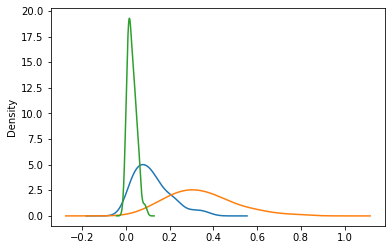

In [26]:
dfCopy.groupby(["cluster"])["Agriculture"].plot.density()

### Industry
__Count:__
- Vemos como hay un numero parecido de paises en el cluster 0 y 2 pero en el 1 hay  el doble.


__Mean,std,min,max:__
- Vemos como el cluster que tiene los valores mas altos es el 1, gracias a la media,max y min.
- Aun asi la desviacion tipica es muy parecida entre todas y pequeña mostrando que puede que se haya agrupado bien entre los individuos de esa clase  y no hay grandes diferencias entre los valores de un mismo cluster.
- Viendo los valores entre los mínimos y máximos, hay problemas entre el grupo 0 y 2. Cluster 0 :[0.032000 - 0.585000], Media: 0.245600.  Cluster 2: [0.040000- 0.666000], Media: 0.232468 . Estos dos grupos si son analizados son prácticamente el mismo.  Esto quiere decir que para el caso de esta variable, el agrupamiento no se realizó adecuadamente o que incluso la k en este caso hubiera sido mejor con k=2 ya que son 2 grupos los que se pueden diferenciar adecuadamente. En la gráfica de la densidad se puede ver este caso con la curva verde y la azul.
   

__25% 50% 75% :__
- En este caso las distribucines vemos que son muy parecidas, ya que tienen los porcentajes muy parecidos. La graficas tambien nos muestran que son muy parecidas. 

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Industry, dtype: object

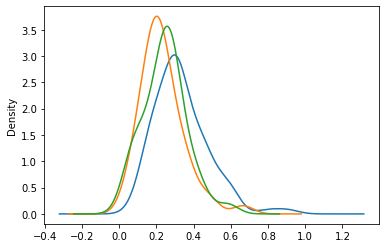

In [27]:
dfCopy.groupby(["cluster"])["Industry"].plot.density()

### Service
__Count:__
- Vemos como hay un numero parecido de paises en el cluster 0 y 2 pero en el 1 hay  el doble.


__Mean,std,min,max:__
- Vemos como el cluster que tiene los valores mas altos es el 0, gracias a la media,max y min.
- Aun asi la desviacion tipica es muy parecida entre todas y pequeña mostrando que se ha agrupado bien y no hay grandes diferencias entre los valores de un mismo cluster.
- Viendo los valores entre los mínimos y máximos se pueden ver que estan mas o menos bien separados, los únicos que se mezclan un poco y se puede observar son el grupo 1 y 2 en la siguiente gráfica. Las curva verde cubre una gran parte del rango de la curva naranja.

__25% 50% 75% :__
- En este caso las distribucines vemos que son muy parecidas, ya que tienen los porcentajes muy parecidos. Y las graficas son muy parecidas.

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Service, dtype: object

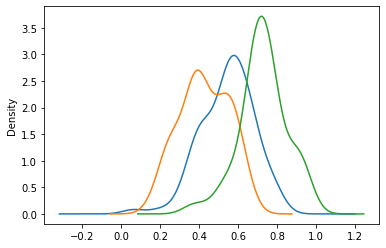

In [28]:
dfCopy.groupby(["cluster"])["Service"].plot.density()

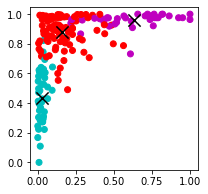

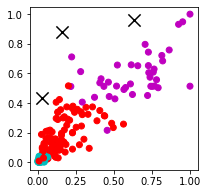

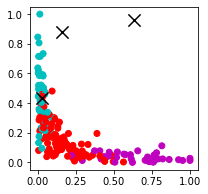

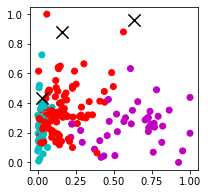

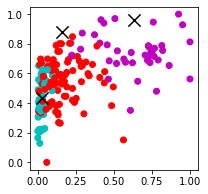

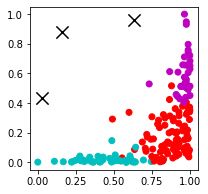

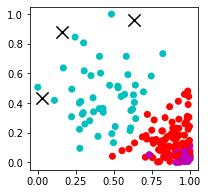

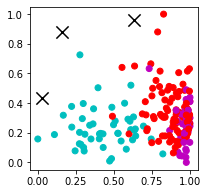

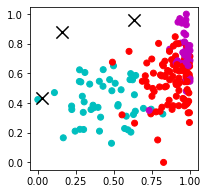

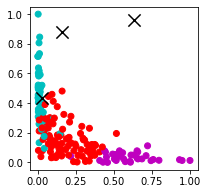

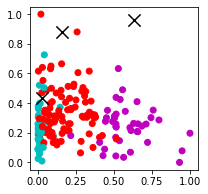

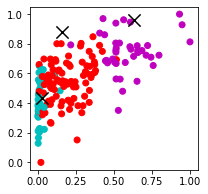

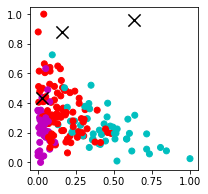

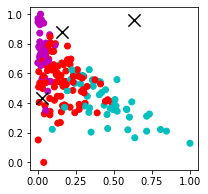

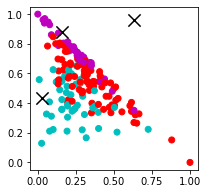

In [29]:
i = 0
while i < len(X2.columns):
    j=i+1
    while j < len(X2.columns):
        plot_clusters(S2_scaledDF, km.labels_, km.cluster_centers_,i,j) #se hace con datos escalados
        j+=1
    i+=1

### Análisis:
- Mejor separación está dada por Phones + Literacy
Luego de ver los análisis hechos anteriormente, se podría pensar que es porque posee una separación similar en cuanto a individuos en cada cluster. 
En cuanto al problema en general, podríamos entonces establecer como relación que en aquellos países donde hay una gran tasa de alfabetización, se tiende a tener mayor número de teléfonos en la población porque la eduación en general puede obstaculizar el desarrollo económico de un país en en el mundo actual; y si no hay un buen desarrollo, menos teléfonos habrán. 

- Luego le sigue las uniones entre las variables Phones, GDP y Literacy:
 Por lo anteriormente analizando, la relación entre el GDP ($ per capita), Literacy y Phones es entendible y por ello el algoritmo es capaz de dividir muy bien los grupos en base a estas 3 variables. 
  
- Las peores separaciones son en función de las variables Service e Industria:
Esto es debido a que el algoritmo no ha sido capaz de definir muy bien los clusters para cada una de esas dos variables. En Estas dos, al menos dos cluster tienen valores mínimos y máximos que se mezcla, medianas muy similares entre dos grupos,etc.